In [1]:
import itertools
import networkx as nx
import numpy as np

import network

from preprocess_data import *
from datetime import date
from enum import Enum

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
def regular_networks():
    for game, venue, (situation, pp) in itertools.product(
        GAMES,
        [Venue.HOME, Venue.AWAY],
        [(Situation.REGULAR, None)]
    ):
        res = build_networks(Game(game), venue=venue, situation=situation, pp=pp)
        if res is not None:
            nw = network.process_graph_for_analysis(res["position_pass_network"], make_undirected=False)
            assortativity = network.assortativity(nw)
            # time = calculate_time(Game(game), None)
            yield assortativity

In [3]:
def power_play_networks():
    for game, venue, pp in itertools.product(
        GAMES,
        [Venue.HOME, Venue.AWAY],
        list(map(PowerPlay, range(1, MAX_PENALTY_NUMBER + 1)))
    ):
        res = build_networks(Game(game), venue=venue, situation=Situation.POWER_PLAY, pp=pp)
        if res is not None:
            nw = network.process_graph_for_analysis(res["position_pass_network"], make_undirected=False)
            if len(nw.nodes) > 0:
                assortativity = network.assortativity(nw)
                yield assortativity

In [4]:
def penalty_kill_networks():
    for game, venue, pp in itertools.product(
        GAMES,
        [Venue.HOME, Venue.AWAY],
        list(map(PowerPlay, range(1, MAX_PENALTY_NUMBER + 1)))
    ):
        res = build_networks(Game(game), venue=venue, situation=Situation.PENALTY_KILL, pp=pp)
        if res is not None:
            nw = network.process_graph_for_analysis(res["position_pass_network"], make_undirected=False)
            if len(nw.nodes) == 5:
                assortativity = network.assortativity(nw)
                yield assortativity

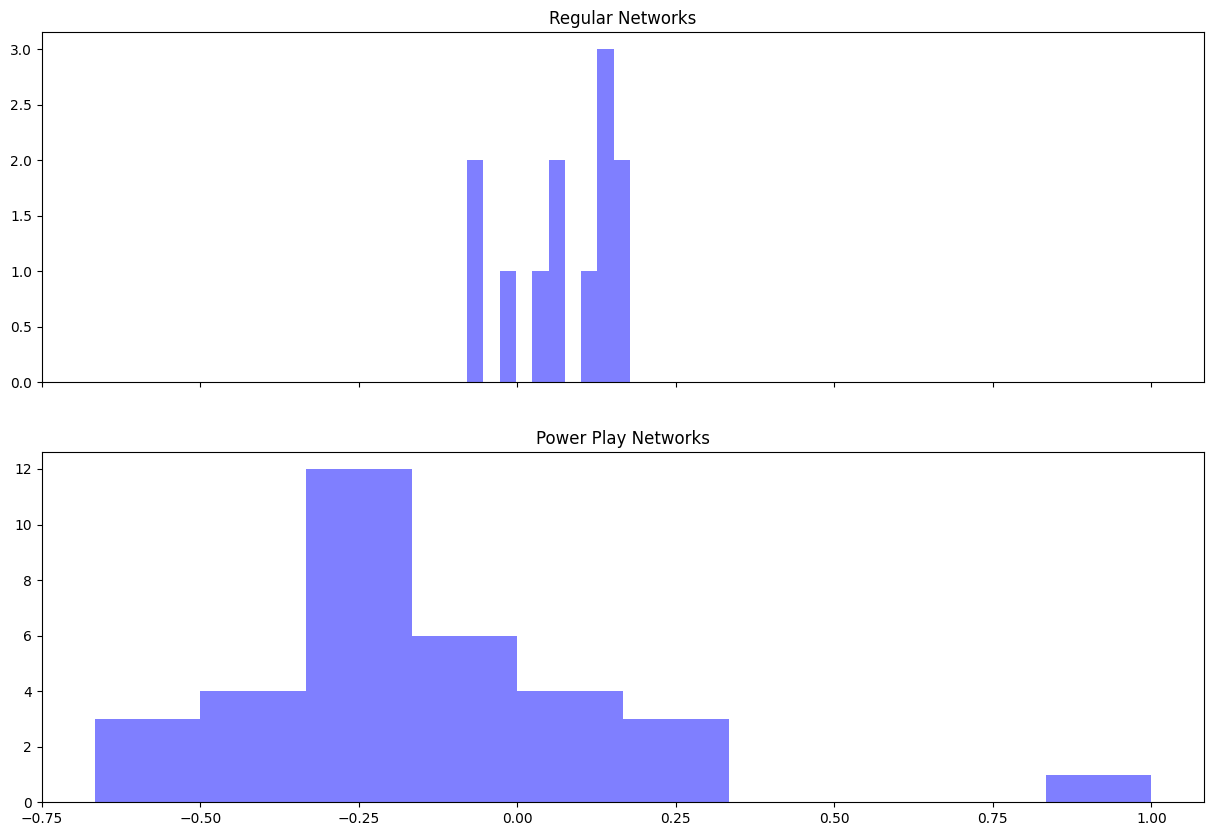

TtestResult(statistic=2.3989991670987436, pvalue=0.010423589224807957, df=43.0)


In [6]:
# Assortativity: Regular vs Power Play
fig, axs = plt.subplots(2, 1, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)

x_reg = list(regular_networks())
x_pp  = list(power_play_networks())
# x_pk  = list(penalty_kill_networks())
n, bins, patches = axs[0].hist(x_reg, facecolor='blue', alpha=0.5)
n, bins, patches = axs[1].hist(x_pp, facecolor='blue', alpha=0.5)
# n, bins, patches = axs[2].hist(x_pk, facecolor='blue', alpha=0.5)
axs[0].set_title("Regular Networks")
axs[1].set_title("Power Play Networks")

plt.savefig("assortativity_rel.png", dpi=300)
plt.show()

print(stats.ttest_ind(x_reg, x_pp, alternative="greater"))
# print(stats.ttest_ind(x_reg, x_pk, alternative="greater"))